In [2]:
# Import the necessary python libraries

import pandas as pd

In [3]:
# Import the dataset into DataFrame

data = pd.read_csv('data.csv')

In [4]:
# Check the structure of the data

data.shape

# The dataset has 11_914 rows and 16 columns

(11914, 16)

In [14]:
# Have an overview of the data

data.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


## Data Pre-Processing Phase

### Data Cleaning

* Change all the column names to a lower case and replace all spaces in-between with an underscore(-)

In [18]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

* Repeat the same process for the object values or entries in the entire dataset.

In [28]:
object_columns = list(data.dtypes[data.dtypes == 'object'].index)

In [29]:
for col in object_columns:
    data[col] = data[col].str.lower().str.replace(' ','_')

In [31]:
data.head(2)

# The data looks consistent at the moment

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


### Inspect the distribution of the target variable - Price


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

<Axes: xlabel='msrp', ylabel='Count'>

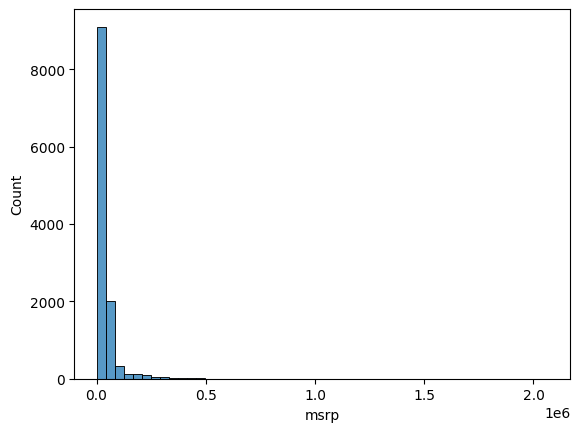

In [39]:
sns.histplot(data.msrp, bins=50)


### 
The price distribution is skewed to the right, but can be normalized using a log function.

In [41]:
import numpy as np

In [46]:
# Normalizing the price distribution

price_log = np.log1p(data.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

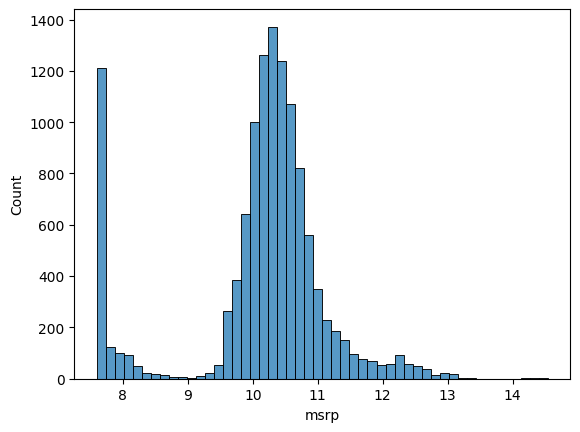

In [45]:
sns.histplot(price_log, bins=50)